In [1]:
#important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load dataset.

In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
data.head()
#print(data.tail())


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#some random values from our data
data.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
218,5,85,74,22,0,29.0,1.224,32,1
48,7,103,66,32,0,39.1,0.344,31,1
334,1,95,60,18,58,23.9,0.260,22,0
14,5,166,72,19,175,25.8,0.587,51,1
257,2,114,68,22,0,28.7,0.092,25,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Data Cleaning

In [7]:
#check is there any NaN value.
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

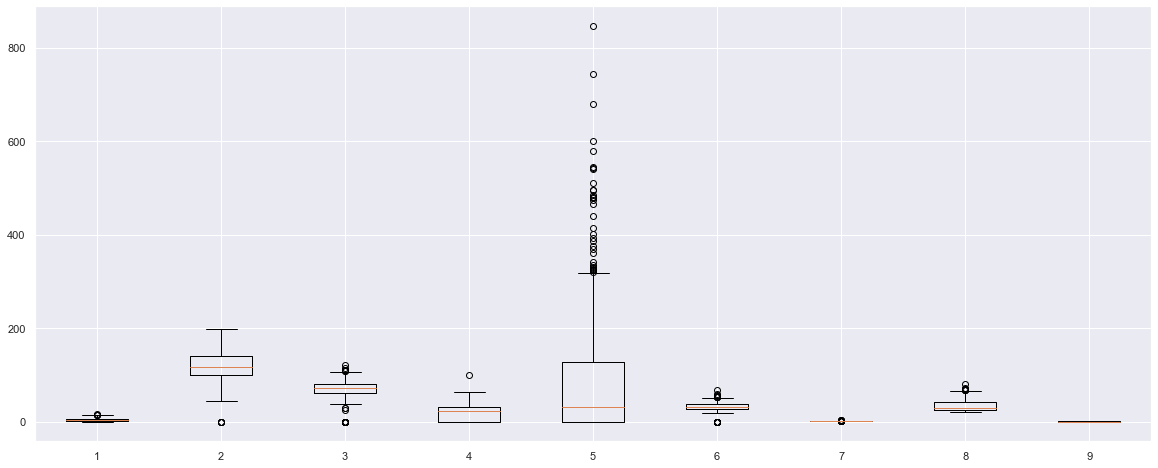

In [20]:
#let's check outlier now.
plt.figure(figsize=(20,8))
plt.boxplot(data)
plt.show()

outliner seen in column 5


C:\Users\kishan kalariya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

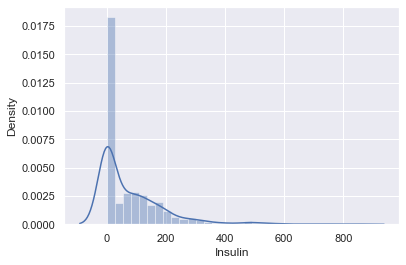

In [22]:
sns.distplot(data["Insulin"])

In [25]:
q=data['Insulin'].quantile(.99)
data1=data[data['Insulin']<q]

C:\Users\kishan kalariya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

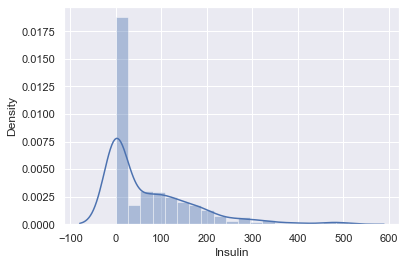

In [27]:
sns.distplot(data1["Insulin"])

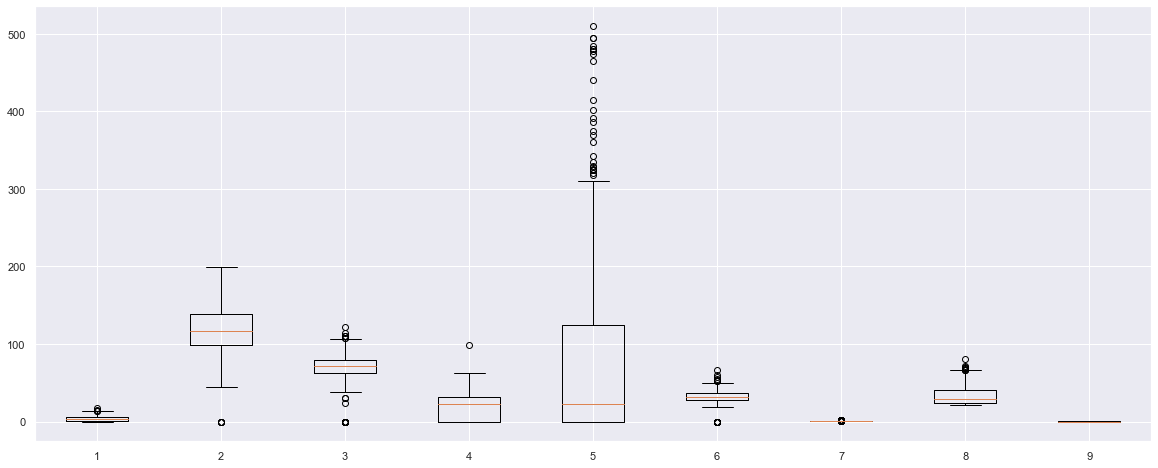

In [28]:
#let's check outlier now.
plt.figure(figsize=(20,8))
plt.boxplot(data1)
plt.show()

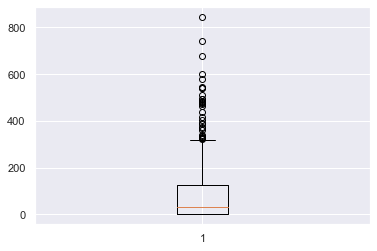

In [29]:
plt.boxplot(data['Insulin'])
plt.show()

# EDA

Firstly lets check that if our data is balanced or not

In [42]:
 bl=data['Outcome'].value_counts()

<AxesSubplot:>

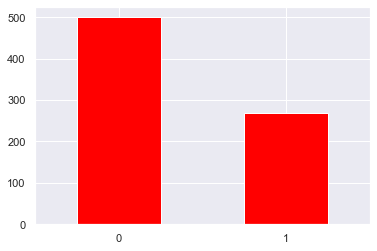

In [56]:
bl.plot(kind='bar',rot=360,color='red')

Our Data is clearly not balanced. We will balance this data using SMOTE technique after some visualizations.

SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling. It focuses on the feature space to generate new instances with the help of interpolation between the positive instances that lie together.


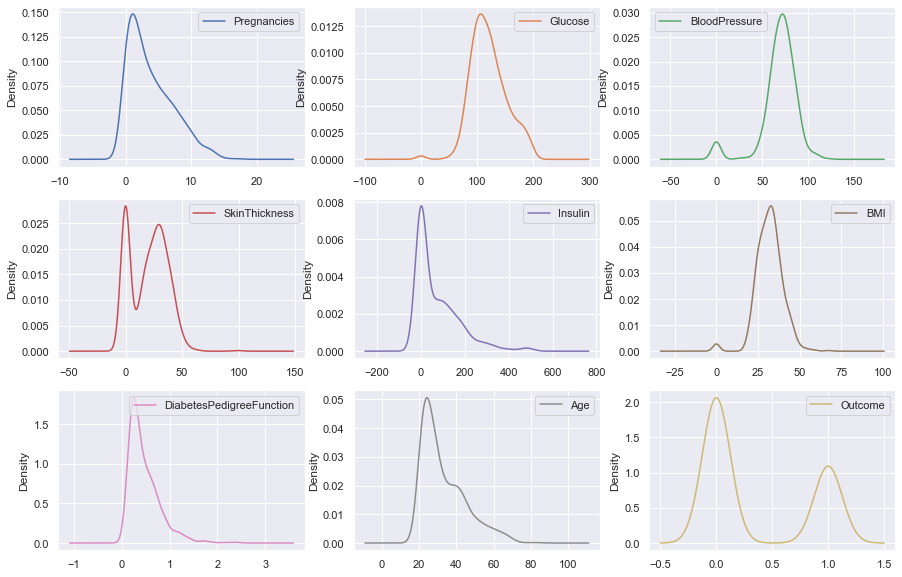

In [57]:
data1.plot(kind= 'kde' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(15,10))
plt.show()

It seems like most attributes are normally distributed.

In [60]:
# Create a correlation matrix
corr_metrics =data1.corr()

corr_metrics.style.background_gradient()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.139892,0.141520,-0.078805,-0.066434,0.023692,-0.036882,0.549059,0.226310
Glucose,0.139892,1.000000,0.154483,0.041520,0.295527,0.215345,0.127173,0.261808,0.468469
BloodPressure,0.141520,0.154483,1.000000,0.206952,0.097152,0.280873,0.040512,0.242664,0.069291
SkinThickness,-0.078805,0.041520,0.206952,1.000000,0.456171,0.389565,0.180389,-0.117463,0.071634
Insulin,-0.066434,0.295527,0.097152,0.456171,1.000000,0.191871,0.170401,-0.077405,0.119709
BMI,0.023692,0.215345,0.280873,0.389565,0.191871,1.000000,0.139903,0.043352,0.298303
DiabetesPedigreeFunction,-0.036882,0.127173,0.040512,0.180389,0.170401,0.139903,1.000000,0.036962,0.185848
Age,0.549059,0.261808,0.242664,-0.117463,-0.077405,0.043352,0.036962,1.000000,0.233129
Outcome,0.226310,0.468469,0.069291,0.071634,0.119709,0.298303,0.185848,0.233129,1.000000


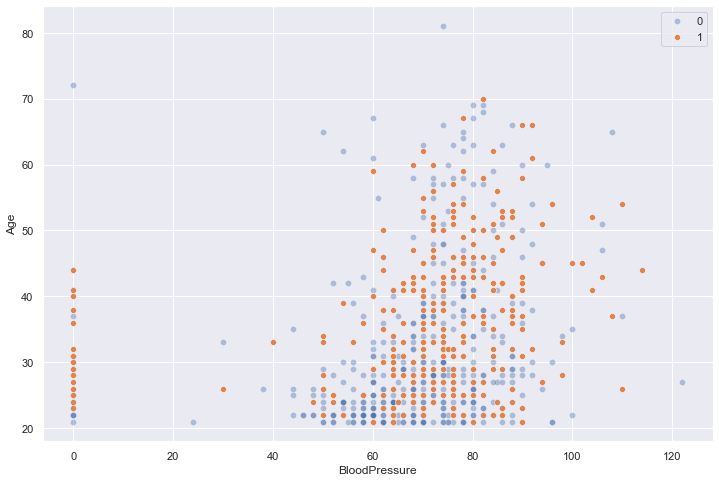

In [64]:
# Age vs BloodPressure with hue = Outcome
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x="BloodPressure", y="Age", alpha=0.4,label="0", data=data[data['Outcome'] == 0])
sns.scatterplot(x="BloodPressure", y="Age", alpha=1, label="1",data=data[data['Outcome'] == 1], ax=ax)
plt.show()

first, Bloodpressure never be zero

In [79]:
data2 = data1[data1['BloodPressure'] != 0]

In [81]:
sum(data2['BloodPressure']==0)

0

In [83]:
# Splitting into features and value to be predicted
X = data2.drop(columns=['Outcome'])
y = data2['Outcome']



ImportError: cannot import name 'delayed' from 'sklearn.utils.fixes' (C:\Users\kishan kalariya\anaconda3\lib\site-packages\sklearn\utils\fixes.py)

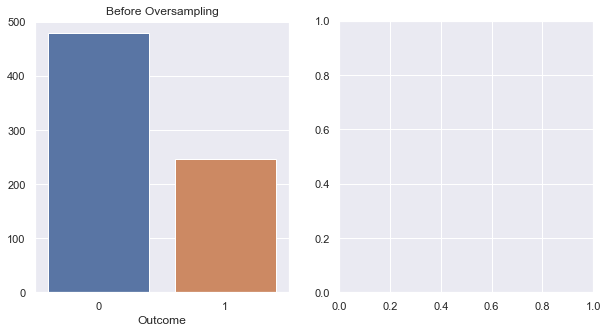

In [88]:
fig, ax = plt.subplots(1,2 ,figsize = (10,5))

sns.barplot(x=['0', '1'], y =[sum(y == 0), sum(y == 1)], ax = ax[0])
ax[0].set_title("Before Oversampling")
ax[0].set_xlabel('Outcome')

#Using SMOTE to balance the Data
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2) 
X, y = sm.fit_resample(X, y) 

sns.barplot(x=['0', '1'], y =[sum(y == 0), sum(y == 1)], ax = ax[1])
ax[1].set_title("After Oversampling")
ax[1].set_xlabel('Outcome')

plt.tight_layout()
plt.show()

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((507, 8), (218, 8), (507,), (218,))